In [1]:
# ipython notebook style figures
%matplotlib inline
import warnings
#warnings.filterwarnings('ignore')
# imports
import sys
# module for manipulating data symphony specific data
from ts import data
# module for time series analysis
from ts import model
import pandas
import numpy as np

In [2]:
indicators = []
for ind in data.listIndicators():
    indicators.append(ind["name"])

# AR and ARMA autogregressive models

In [3]:
df = pandas.DataFrame()
df = df.append([["IND", "PREV", "AR", "ARMA", "MIN R2"]])
vals = []
for ind in data.listIndicators():
    ind_name = ind["name"]
    ind_desc = ind["desc"]
    try:
        # ts autoregressive models
        indicator = data.getIndicator(ind_name)
        ar = model.AR_val(indicator, 24)
        arma = model.ARMA_val(indicator, 24)
        prev = model.validation_prev(indicator, 24)
        # standard ml models
        #f = model.feature_set(indicator, 10, 4)
        #rf = model.RF_fc(f[0], f[1])

        # find min RMSE
        min_rmse = prev[1]["RMSE"]
        min_rmse_lbl = "PREV"

        if ar[2]["RMSE"] < min_rmse:
            min_rmse = ar[2]["RMSE"]
            min_rmse_lbl = "AR"
        if arma[2]["RMSE"] < min_rmse:
            min_rmse = arma[2]["RMSE"]
            min_rmse_lbl = "ARMA"
        #if rf[2]["RMSE"] < min_rmse:
        #    min_rmse = rf[2]["RMSE"]
        #    min_rmse_lbl = "RF"

        # find min NRMSD
        min_nrmsd = prev[1]["NRMSD"]
        min_nrmsd_lbl = "PREV"
        if ar[2]["NRMSD"] < min_nrmsd:
            min_nrmsd = ar[2]["NRMSD"]
            min_nrmsd_lbl = "AR"
        if arma[2]["NRMSD"] < min_nrmsd:
            min_nrmsd = arma[2]["NRMSD"]
            min_nrmsd_lbl = "ARMA"
        #if rf[2]["NRMSD"] < min_nrmsd:
        #    min_nrmsd = rf[2]["RMSE"]
        #    min_nrmsd_lbl = "RF"

        # find min R2
        min_r2 = prev[1]["R2"]
        min_r2_lbl = "PREV"
        if ar[2]["R2"] > min_r2:
            min_r2 = ar[2]["R2"]
            min_r2_lbl = "AR"
        if arma[2]["R2"] > min_r2:
            min_r2 = arma[2]["R2"]
            min_r2_lbl = "ARMA"
        #if rf[2]["R2"] > min_r2:
        #    min_r2 = rf[2]["R2"]
        #    min_r2_lbl = "RF"

        vals.append((indicator, prev[0], ar[0], arma[0], prev[0], ar[1], ind_name, ind_desc, prev[1]["R2"], ar[2]["R2"], arma[2]["R2"]))
        df = df.append([[ind_name, prev[1]["R2"], ar[2]["R2"], arma[2]["R2"], min_r2_lbl]])
    except:
        pass
df

/home/mario/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/mario/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/mario/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:443: RuntimeWarning: Inverting hessian failed, no bse or cov_params available
  warn(warndoc, RuntimeWarning)
/home/mario/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/mario/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Che

,0,1,2,3,4
0,IND,PREV,AR,ARMA,MIN R2


In [ ]:
for val in vals:
    try:
        model.plot_pred_4(val[7]+"\n"+val[6],val[0],val[1],val[2],val[3],val[5], val[8], val[9], val[10])
    except:
        pass

# Random Forest

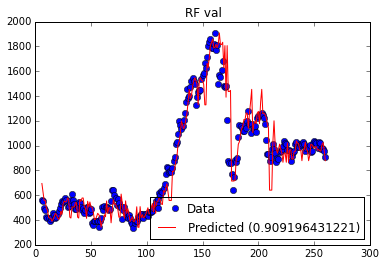

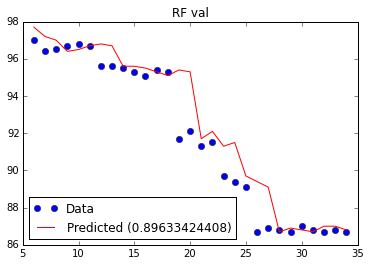

In [ ]:
for ind in data.listIndicators():
    ind_name = ind["name"]
    ind_desc = ind["desc"]
    indicator = data.getIndicator(ind_name)
    f = model.feature_set(indicator, 5, 24)
    val = model.RF_fc(f[0], f[1])
    model.plot_pred1("RF val", indicator, val[0], val[1], val[2]["R2"])

In [ ]:
c = val[3]

In [ ]:
c

In [ ]:
c.feature_importances_